# Twitter analysis for social unrest


In [26]:
import numpy as np
import pandas as pd

#Displaying data as dataframe
#pd.read_csv reads a comma-separated values (csv) file into dataframe.
trainingData = pd.read_csv("tweets.csv")

#Displaying certain columns from the dataframe to display - ['text', 'target']
# df.loc accesses a group of rows and columns by label(s) from dataframe.
trainingData = trainingData.loc[:]
trainingData

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


### Preprocessing the tweets

#### Dropping duplicate tweets

In [27]:
# Removing duplicates from the dataframe
def remove_duplicate_tweets(dataframe):
#     pd.DataFrame.drop_duplicates - returns DataFrame with duplicate rows removed.
    dataframe.drop_duplicates(subset=['text'])
    return dataframe

#### Dropping empty tweets

In [28]:
# Removing empty tweets from the dataframe
def remove_empty_tweets(dataframe):
    # pd.DataFrame.dropna - removes missing tweets.
    dataframe.dropna(subset = ['text'], inplace = True)
    return dataframe

#### Converting tweets to lowercase

In [29]:
#Converting tweet text to lowercase for tokenization
def convert_to_lowercase(dataframe):
    for index, val in dataframe.iterrows():
        dataframe.at[index,'text'] = val['text'].lower()
    return dataframe

#### Converting empty locations

In [30]:
#Dropping all rows containing empty locations
def remove_empty_locations(dataframe):
    dataframe.dropna(subset=['location'])
    dataframe.dropna(subset = ['location'], inplace = True)
    return dataframe

#### Remove hyperlinks

In [31]:
#Remove hyperlinks from the tweet text
def remove_hyperlinks(dataframe):
    for index, val in dataframe.iterrows():
        processed_tweet = ''
        words = val['text'].split(' ')
        for word in words:
            if 'http' not in word:
                processed_tweet += f'{word} '
        dataframe.at[index,'text'] = processed_tweet
    return dataframe

#### Removing hashtags

In [32]:
def remove_hashtags(dataframe):
    result = []
    for index, val in dataframe.iterrows():
        processed_tweet = ''
        hashtags = []
        words = val['text'].split(' ')
        for word in words:
            if '#' not in word:
                processed_tweet += f'{word} '
            else:
                hashtags.append(word)
        dataframe.at[index,'text'] = processed_tweet
        result.append(hashtags)
    
    return result

#### Remove mentioned users

In [33]:
def remove_mentioned_users(dataframe):
    result = []
    for index, val in dataframe.iterrows():
        processed_tweet = ''
        mentioned_users = []
        words = val['text'].split(' ')
        for word in words:
            if '@' not in word:
                processed_tweet += f'{word} '
            else:
                mentioned_users.append(word)
        dataframe.at[index,'text'] = processed_tweet
        result.append(mentioned_users)
    
    return result

### Feature extraction

#### Tokenize words

In [34]:
from nltk.tokenize import word_tokenize

def tokenize_words(dataframe):
    dataframe['cleaned_text'] = ''
    for index, val in dataframe.iterrows():
         words = word_tokenize(val['text'])
         words = filter(lambda x: len(x) > 2, words)
         dataframe.at[index,'cleaned_text'] = ' '.join(words)
    return dataframe

#### Removing stopwords

In [35]:
from nltk.corpus import stopwords

def remove_stopwords(dataframe):
    stopwords_array = stopwords.words('english')
    for index, val in dataframe.iterrows():
        text = []
        words = val['text'].split(' ')
        for word in words:
            if word not in stopwords_array:
                text.append(word)
        dataframe.at[index,'cleaned_text'] = ' '.join(text)   
    return dataframe

#### Implementing stemming

In [36]:
from nltk.stem import PorterStemmer

def stemming(dataframe):
    stemmer = PorterStemmer()
    for index, val in dataframe.iterrows():
        words = val['text'].split(' ')
        
        text = [stemmer.stem(word) for word in words]  
        dataframe.at[index,'cleaned_text'] = ' '.join(text)
        
    return dataframe

### Visualizing wordCloud

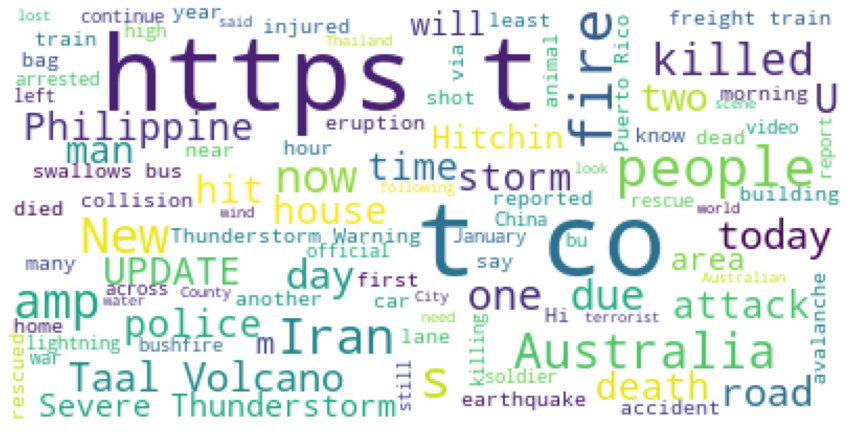

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_array = ' '.join(list(trainingData[trainingData['target'] == 1]['text']))

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(spam_array)
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Processing training dataset

In [38]:
trainingData = remove_duplicate_tweets(trainingData)
trainingData = remove_empty_tweets(trainingData)
trainingData = convert_to_lowercase(trainingData)
trainingData = remove_hyperlinks(trainingData)
trainingData['hashtags'] = remove_hashtags(trainingData)
trainingData['mentioned_users'] = remove_mentioned_users(trainingData)
trainingData = tokenize_words(trainingData)
trainingData = remove_stopwords(trainingData)
trainingData = stemming(trainingData)

trainingData.reset_index(inplace = True)
trainingData.drop(['index'], axis = 1, inplace = True)
trainingData.head()

,id,keyword,location,text,target,hashtags,mentioned_users,cleaned_text
0,0,ablaze,NaN,"communal violence in bhainsa, telangana. ""ston...",1,[],[],"commun violenc in bhainsa, telangana. ""stone w..."
1,1,ablaze,NaN,telangana: section 144 has been imposed in bha...,1,[],[],telangana: section 144 ha been impos in bhains...
2,2,ablaze,New York City,arsonist sets cars ablaze at dealership,1,[],[],arsonist set car ablaz at dealership
3,3,ablaze,"Morgantown, WV",arsonist sets cars ablaze at dealership,1,[],[],arsonist set car ablaz at dealership
4,4,ablaze,NaN,"""lord jesus, your love brings freedom and pard...",0,[],[],"""lord jesus, your love bring freedom and pardo..."


### Processing testing dataset

In [39]:
testData = pd.read_csv("tweetsdata/gunnar.csv")
testData = remove_duplicate_tweets(testData)
testData = remove_empty_tweets(testData)
testData = convert_to_lowercase(testData)
testData = remove_empty_locations(testData)
testData = remove_hyperlinks(testData)
testData['hashtags'] = remove_hashtags(testData)
testData['mentioned_users'] = remove_mentioned_users(testData)
testData = tokenize_words(testData)
testData = remove_stopwords(testData)
testData = stemming(testData)

testData.reset_index(inplace = True)
testData.drop(['index'], axis = 1, inplace = True)
testData.head()

,username,location,followers,tweetcreatedts,retweetcount,text,hashtags,mentioned_users,cleaned_text
0,Cburns33Jones,"Albuquerque, NM",113,2021-05-03 15:26:10,89,"rt get ready, america! these rallies will be h...",[#democr…],[@frfrankpavone:],"rt get ready, america! these ralli will be hap..."
1,notoutvoted,MICHIGAN,429,2021-05-03 15:25:53,0,hey 👇🏼 open your eyes. this was trump everyday...,"[#maga, #grifter, #trump, #trumpcrimefamily, #...",[],hey 👇🏼 open your eyes. thi wa trump everyday f...
2,drseid,"Mayflower, AR",1790,2021-05-03 15:25:42,185,"rt vaccine hesitancy. kudos to the artist, who...",[#maga'ts],[@dearauntcrabby:],"rt vaccin hesitancy. kudo to the artist, whome..."
3,LABrauer183,"Massachusetts, USA",1913,2021-05-03 15:25:03,1,rt you indoctrinated thralls are different fro...,[#bluemaga],"[@srceenterprise:, @edoswald, @briebriejoy, @t...",rt you indoctrin thrall are differ from poorli...
4,KristineLogie,Texas,173,2021-05-03 15:25:02,6,rt supremacist president\ntrump’s decision to ...,[],[@bombshelldaily:],rt supremacist president\ntrump’ decis to prom...


### Vectorization

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(decode_error='ignore')

training_X = count_vectorizer.fit_transform(trainingData['cleaned_text'])

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# split up the data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(training_X, trainingData['target'], test_size=0.33)

# create the model, train it, print scores
model = LogisticRegression()
model.fit(training_X, trainingData['target'])

print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))


train score: 0.9721675200210056
test score: 0.9760191846522782


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Computing precision 

In [42]:
from sklearn.metrics import precision_score

y_pred_train = model.predict(Xtrain)

precision_score(Ytrain, y_pred_train)

0.978494623655914

#### Computing recall 

In [43]:
from sklearn.metrics import recall_score

recall_score(Ytrain, y_pred_train)

0.8737997256515775

#### Plotting precision vs recall curve

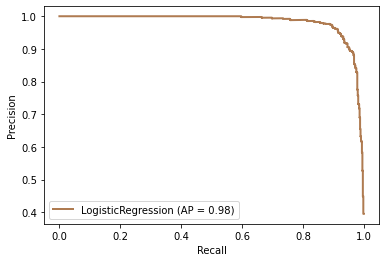

In [44]:
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(model, Xtest, Ytest, color='#af7b51', lw=2)


### Analysing sentiment behind the tweets

In [45]:
# Importing VADER from NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a sid object called SentimentIntensityAnalyzer()
sid = SentimentIntensityAnalyzer()

# Apply polarity_score method of SentimentIntensityAnalyzer()
testData['sentiment'] = testData['cleaned_text'].apply(lambda x: sid.polarity_scores(x))

# Keep only the compound scores under the column 'Sentiment'
testData = pd.concat([testData.drop(['sentiment'], axis = 1), testData['sentiment'].apply(pd.Series)], axis = 1)
testData


,username,location,followers,tweetcreatedts,retweetcount,text,hashtags,mentioned_users,cleaned_text,neg,neu,pos,compound
0,Cburns33Jones,"Albuquerque, NM",113,2021-05-03 15:26:10,89,"rt get ready, america! these rallies will be h...",[#democr…],[@frfrankpavone:],"rt get ready, america! these ralli will be hap...",0.000,0.791,0.209,0.6476
1,notoutvoted,MICHIGAN,429,2021-05-03 15:25:53,0,hey 👇🏼 open your eyes. this was trump everyday...,"[#maga, #grifter, #trump, #trumpcrimefamily, #...",[],hey 👇🏼 open your eyes. thi wa trump everyday f...,0.000,1.000,0.000,0.0000
2,drseid,"Mayflower, AR",1790,2021-05-03 15:25:42,185,"rt vaccine hesitancy. kudos to the artist, who...",[#maga'ts],[@dearauntcrabby:],"rt vaccin hesitancy. kudo to the artist, whome...",0.180,0.820,0.000,-0.2942
3,LABrauer183,"Massachusetts, USA",1913,2021-05-03 15:25:03,1,rt you indoctrinated thralls are different fro...,[#bluemaga],"[@srceenterprise:, @edoswald, @briebriejoy, @t...",rt you indoctrin thrall are differ from poorli...,0.000,1.000,0.000,0.0000
4,KristineLogie,Texas,173,2021-05-03 15:25:02,6,rt supremacist president\ntrump’s decision to ...,[],[@bombshelldaily:],rt supremacist president\ntrump’ decis to prom...,0.193,0.729,0.078,-0.4939
...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,NewYorkScribe,New York,4649,2021-05-03 13:49:47,71,rt america embarrassed\narizona ballot audit i...,[],[@bombshelldaily:],rt america embarrassed\narizona ballot audit i...,0.104,0.747,0.149,0.2732
769,Joni_Looking,Home MI & FL,6140,2021-05-03 13:49:22,194,"rt vaccine hesitancy. kudos to the artist, who...",[#maga'ts],[@dearauntcrabby:],"rt vaccin hesitancy. kudo to the artist, whome...",0.180,0.820,0.000,-0.2942
770,jam2478,"Lake Mary, Florida",1000,2021-05-03 13:49:14,194,"rt vaccine hesitancy. kudos to the artist, who...",[#maga'ts],[@dearauntcrabby:],"rt vaccin hesitancy. kudo to the artist, whome...",0.180,0.820,0.000,-0.2942
771,BuffayLatina,"Fredericksburg, TX",105,2021-05-03 13:48:24,0,"i have been cancelled too, only just twice. re...",[#maga],[@notsweetthing],"i have been cancel too, onli just twice. resta...",0.156,0.844,0.000,-0.3786


In [46]:
# Create a new column called 'sentiment_class'
sentimentclass_list = []

for i in range(0, len(testData)):
    compound_score = testData.iloc[i,:]['compound']
    
    if (compound_score <= 1.0 and compound_score >= 0.50):
        sentimentclass_list.append(5)
    elif (compound_score < 0.50 and compound_score >= 0.10):
        sentimentclass_list.append(4)
    elif (compound_score < 0.10 and compound_score > -0.10):
        sentimentclass_list.append(3)
    elif (compound_score <= -0.10 and compound_score > -0.50):
        sentimentclass_list.append(2)
    elif (compound_score <= -0.50 and compound_score >= -1.00):
        sentimentclass_list.append(1)

# Add the new column 'sentiment_class' to the dataframe
testData['sentiment_class'] = sentimentclass_list
del testData['neg']
del testData['neu']
del testData['pos']
del testData['compound']

# Check out the new column
testData.head()

,username,location,followers,tweetcreatedts,retweetcount,text,hashtags,mentioned_users,cleaned_text,sentiment_class
0,Cburns33Jones,"Albuquerque, NM",113,2021-05-03 15:26:10,89,"rt get ready, america! these rallies will be h...",[#democr…],[@frfrankpavone:],"rt get ready, america! these ralli will be hap...",5
1,notoutvoted,MICHIGAN,429,2021-05-03 15:25:53,0,hey 👇🏼 open your eyes. this was trump everyday...,"[#maga, #grifter, #trump, #trumpcrimefamily, #...",[],hey 👇🏼 open your eyes. thi wa trump everyday f...,3
2,drseid,"Mayflower, AR",1790,2021-05-03 15:25:42,185,"rt vaccine hesitancy. kudos to the artist, who...",[#maga'ts],[@dearauntcrabby:],"rt vaccin hesitancy. kudo to the artist, whome...",2
3,LABrauer183,"Massachusetts, USA",1913,2021-05-03 15:25:03,1,rt you indoctrinated thralls are different fro...,[#bluemaga],"[@srceenterprise:, @edoswald, @briebriejoy, @t...",rt you indoctrin thrall are differ from poorli...,3
4,KristineLogie,Texas,173,2021-05-03 15:25:02,6,rt supremacist president\ntrump’s decision to ...,[],[@bombshelldaily:],rt supremacist president\ntrump’ decis to prom...,2


### Exporting data

In [47]:
output = testData.to_csv('tweetsdata/output.csv')
print(output)

None
